<a href="https://colab.research.google.com/github/Evelyn-Rojas/Investigaci-n-de-operaciones-7MM1/blob/main/InventarioDescuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='deepskyblue'> **Evelyn Tania Rojas Roa**

---



# <font color='darkorange'> **Inventario con descuento**

---



**Ejercicio:**

LubeCar se especializa en cambios rápidos de aceite para motor de automóvil. El servicio compra aceite para motor a granel, a por galón. Si LubeCar compra más de 100 galones, obtiene un descuento de 2.5 por galón. En el servicio se atienden unos 150 autos diarios, y cada cambio de aceite requiere de 1.25 galones. LubeCar guarda el aceite a granel con un costo de por galón y por día. También, el costo de colocar un pedido de aceite a granel es de 20 . Hay un tiempo de 2 días para la entrega. Determine la política óptima de inventario.

El consumo diario de aceite es
D = 150 automóviles por día x 1.25 galones por automóvil = 187.5 galones por día

Extrayendo los datos necesarios del enunciado tendremos:

\
\begin{aligned}
h &= \$0.02 \text{ por galón por día} \\
K &= \$20 \text{ por pedido} \\
L &= 2 \text{ días} \\
c_1 &= \$3 \text{ por galón} \\
c_2 &= \$2.50 \text{ por galón} \\
q &= 1000 \text{ galones}
\end{aligned}



Para identificar la zona:

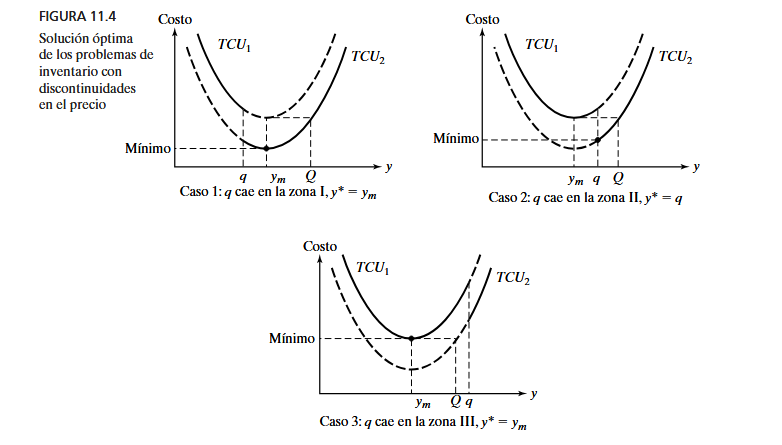

In [3]:
#Importamos las librerías necesarias
import sympy as sp #Calculo simbólico
import matplotlib.pyplot as plt #Gráficas
import numpy as np
import math as m

In [35]:
#Definimos los símbolos y funciones
c1,c2,d,h,k,L,Qop,Q=sp.symbols('c1,c2,d,h,k,L,Qop,Q')
T=sp.Function('T')
Qo=sp.Function("Qo")

In [36]:
#Valores correspondientes al problema:
c1=3
c2=2.5
d=187.5
h=0.02
k=20
L=2
q=1000
Qop=612.3724

**PASO 1. Calcula Q***

In [37]:
def Qop(k,d,h):
 return np.sqrt((2*k*d)/h)

In [38]:
Qo=Qop(k,d,h)

In [39]:
print ('Q*=',Qo)

Q*= 612.3724356957945


**Paso 2. Determinar la zona en que se encuentra q**

In [40]:
def T(Q):
    if Q<=q:
      f=c1*d + (k*d)/Q + (h*Q)/2
    else:
      f=c2*d + (k*d)/Q + (h*Q)/2
    return f

In [43]:
T(Qo)

np.float64(574.7474487139159)

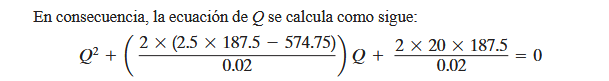

In [45]:
eq=sp.Eq(Q**2+(2/h)*(c2*d-T(Qo))*Q+(2*k*d)/h, 0)

In [51]:
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

Resolviendo dicha ecuación

In [54]:
sol=sp.solve(eq,Q) #Función de sympy para resolver ecuaciones

In [53]:
sol

[35.4970848447485, 10564.2477865469]

In [56]:
print ('Como',sol[1],'>',Qo )

Como 10564.2477865469 > 612.3724356957945


Entonces se elige la Zona ll, q= Q*

Como el tiempo de entrega es de 2 días, el punto de reorden es 2D = 187.5 x 2 = 375 galones. Así, la política de inventario óptimo es

**Pedir 1000 galones cuando el nivel de inventario baja a 375 galones**

---



Ejercicio 1: Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [75]:
Q = sp.symbols('Q')
def Q_Optima(c1, c2, d, h, k, q):
    Qo = np.sqrt((2 * k * d) / h) #Obtenemos Q*
    T_Qo_val = c1 * d + (k * d) / Qo+ (h * Qo) / 2
    eq_numerica = Q**2 + (2 / h) * (c2 * d - T_Qo_val) * Q + (2 * k * d) / h #Obtenemos la ecuación
    soluciones = sp.solve(eq_numerica, Q) #Resolvemos la ecuación

    sol_float = [float(s) for s in soluciones] # Convertir soluciones a float y seleccionar la solución
    sol_mayor = max(sol_float)

    if sol_mayor > Qo:
        T_Qo_base = c1 * d + (k * d) / Qo + (h * Qo) / 2
        T_q = c2 * d + (k * d) / q + (h * q) / 2

        if T_Qo_base < T_q:
             Q_optima = Qo
             region = "Región I (Q <= q)"
             costo_minimo = T_Qo_base
        else:
             Q_optima = q # Se ajusta al quiebre para obtener el descuento
             region = "Región II (Q > q)"
             costo_minimo = T_q
    else:
        Q_optima = Qo_base
        region = "Región II (Q > q)"
        costo_minimo = c2 * d + (k * d) / Q_optima + (h * Q_optima) / 2

    return Q_optima, region, costo_minimo, Qo, raiz_superior

In [77]:
Q_optima_final, region_final, costo_final, Qo, raiz_superior = Q_Optima(c1, c2, d, h, k, q) #Llamamos a la función
print(f"Q*: {Qo:.4f}")
print(f"Solución de la ecuación: {raiz_superior:.4f}")
print(f"Cantidad Óptima de Pedido: {Q_optima_final:.0f} galones")
print(f"Región de la Solución Óptima: {region_final}")

Q*: 612.3724
Solución de la ecuación: 10564.2478
Cantidad Óptima de Pedido: 1000 galones
Región de la Solución Óptima: Región II (Q > q)


Calculamos t*

In [83]:
t=Qo/d
t

np.float64(3.2659863237109037)

In [85]:
n=np.floor(L/t)

Obtenemos el tiempo efectivo de entrega:

$$L_e = L - n t^*$$

In [86]:
Le=L-n*t

In [89]:
print('Tiempo efectivo de entrega:', int(Le), 'días') #int convierte a entero

Tiempo efectivo de entrega: 2 días


**Ejercicio 2: Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.**

In [128]:
import numpy as np

def Politica_Inventario_Optima(c1, c2, d, h, k, q, L_dias):
    try:
        Qo = np.sqrt((2 * k * d) / h)
    except ZeroDivisionError:
        return "Error: El costo de mantenimiento (h) no puede ser cero"
    T_Qo_base = c1 * d + (k * d) / Qo + (h * Qo) / 2
    T_q = c2 * d + (k * d) / q + (h * q) / 2
    if Qo_base < q:
        if T_Qo_base <= T_q:
            Q_optima = Qo
            Costo_Minimo = T_Qo_base
        else:
            Q_optima = q
            Costo_Minimo = T_q
    else:
        Q_optima = Qo

    R_final = L*d
    print ('Política de inventario:')
    print(f'Pedir {Q_optima_final:.0f} galones cuando el nivel de inventario baje a {R_final:.0f} galones con un tiempo efectivo de entrega de {Le:.0f} días ')

    return Q_optima, R_final

In [129]:
Q_optima_final, R_final = Politica_Inventario_Optima(c1, c2, d, h, k, q, L)

Política de inventario:
Pedir 1000 galones cuando el nivel de inventario baje a 375 galones con un tiempo efectivo de entrega de 2 días 


Gráfica:

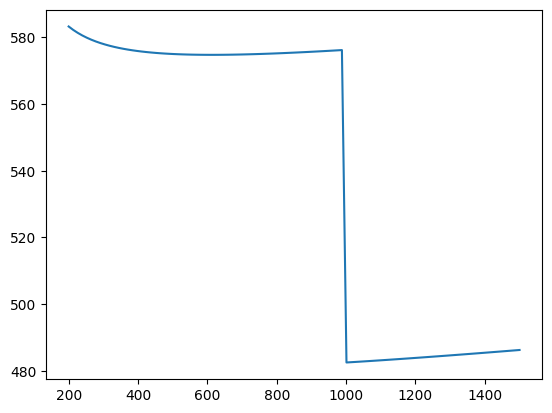

In [125]:
x=np.linspace(200,1500,100)
#Se necesita convertir a arreglos para poder gráficar
def T(Q_array,c1,c2,q,h,k,d):
    f_case1 = c1*d + (k*d)/Q_array + (h*Q_array)/2
    f_case2 = c2*d + (k*d)/Q_array + (h*Q_array)/2
    return np.where(Q_array <= q, f_case1, f_case2)

plt.plot(x,T(x,c1,c2,q,h,k,d))